In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from astropy.table import Table

In [2]:
plt.style.use("fivethirtyeight")

All RV measurements for all stars are compiled from Simbad using TAP Service using the following query:

```
SELECT t.name, bibcode, nbmes, obsdate, qual, quality,
    velType, velValue, velValue_prec, remark, remarks, ident.oidref
FROM TAP_UPLOAD.mytable as t JOIN ident ON t.name = ident.id
JOIN mesVelocities ON mesVelocities.oidref = ident.oidref
```
where I upload a table of one column of hipparcos or tycho2 id strings.

In [3]:
dfrv = pd.read_csv("../data/star_rv.csv")

In [4]:
dfrv.head()

,name,bibcode,nbmes,obsdate,qual,quality,velType,velValue,velValue_prec,remark,remarks,oidref
0,TYC 8082-63-1,17AJ....153...7521K,1.0,55519.627,B,B,v,12.01,2.0,NaN,NaN,3012043.0
1,TYC 6754-1347-1,17AJ....153...7521K,1.0,54673.365,B,B,v,-49.15,2.0,NaN,NaN,2298060.0
2,HIP 101787,2004A&A...418..989N,1.0,NaN,NaN,C,v,-12.20,1.0,NaN,NaN,3515023.0
3,HIP 101787,2006AstL...32..759G,NaN,NaN,NaN,C,V,-12.40,2.0,NaN,NaN,3515023.0
4,TYC 5899-26-1,2012ApJ...758...56S,NaN,NaN,NaN,NaN,v,27.90,1.0,NaN,NaN,738151.0


In [5]:
dfrv.groupby("quality")['name'].describe()

quality        
A        count                 508
         unique                360
         top            HIP 107362
         freq                    6
B        count                 864
         unique                709
         top       TYC 6166-1405-1
         freq                    4
C        count                 382
         unique                313
         top         TYC 7281-20-1
         freq                    3
D        count                  89
         unique                 84
         top       TYC 8966-1241-1
         freq                    3
E        count                  31
         unique                 30
         top            HIP 109388
         freq                    2
Name: name, dtype: object

In [6]:
rvA = dfrv.loc[dfrv.quality == 'A'].groupby("name")

In [7]:
# see if multiple quality A measurements agree with each other
rvAmulti = rvA.filter(lambda x:x.bibcode.unique().size>1)

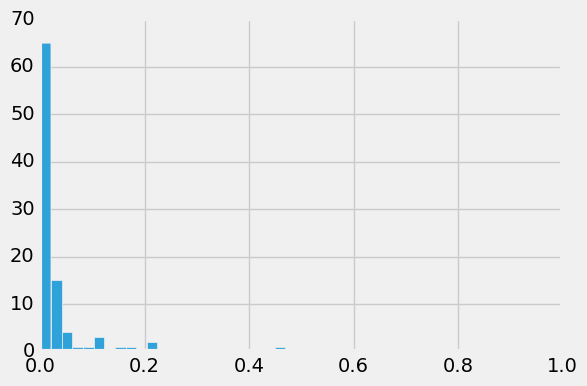

In [8]:
rvAmulti.groupby("name").velValue.agg(lambda x: np.abs((x.max()-x.min())/x.mean())).hist(bins=np.linspace(0,1,50))

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


(0.1, 10000.0)

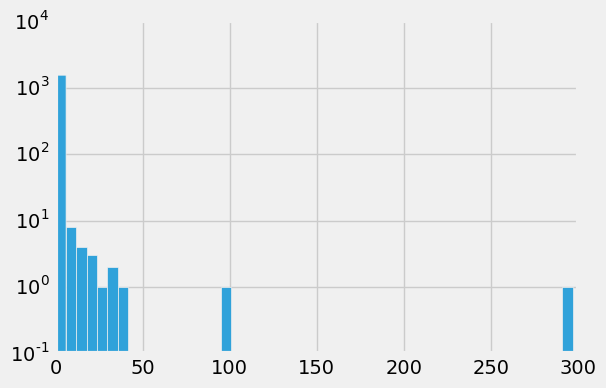

In [9]:
dfrv.groupby("name").velValue.agg(lambda x: np.abs((x.max()-x.min())/x.mean())).hist(bins=50, log=True)
plt.ylim(0.1)

In [10]:
# those that differ more than 10%
rvAmulti.groupby("name").filter(lambda x: np.abs(x.velValue.max()-x.velValue.min())/x.velValue.mean() > 0.1)

,name,bibcode,nbmes,obsdate,qual,quality,velType,velValue,velValue_prec,remark,remarks,oidref
322,HIP 107362,17AJ....153...7521K,1.0,53610.564,A,A,v,16.640000,2.0,NaN,NaN,3470803.0
323,HIP 107362,2013A&A...552A..64S,NaN,NaN,NaN,A,z,19.374000,3.0,NaN,NaN,3470803.0
324,HIP 107362,2011AJ....141..187S,1.0,53609.000,A,A,v,18.619000,3.0,NaN,NaN,3470803.0
325,HIP 107362,2011AJ....141..187S,1.0,53609.000,A,A,v,16.644000,3.0,NaN,NaN,3470803.0
326,HIP 107362,2006AstL...32..759G,NaN,NaN,NaN,A,V,18.000000,2.0,NaN,NaN,3470803.0
327,HIP 107362,2004A&A...418..989N,5.0,NaN,NaN,A,v,19.299999,1.0,NaN,NaN,3470803.0
518,TYC 7464-1208-1,17AJ....153...7521K,1.0,53133.762,A,A,v,5.720000,2.0,NaN,NaN,2340062.0
519,TYC 7464-1208-1,2011AJ....141..187S,1.0,53132.000,A,A,v,5.722000,3.0,NaN,NaN,2340062.0
520,TYC 7464-1208-1,2008AJ....136..421Z,1.0,NaN,NaN,A,v,7.100000,1.0,NaN,NaN,2340062.0
865,HIP 103480,2004A&A...418..989N,2.0,NaN,NaN,A,v,3.300000,1.0,NaN,NaN,2507798.0


In [206]:
dfrv.remark.value_counts()

    2618
Name: remark, dtype: int64

In [207]:
dfrv.remarks.value_counts()

      2449
##     122
V       43
O        3
D        1
Name: remarks, dtype: int64

In [11]:
# see sources of quality A measurments
dfrv.loc[dfrv.quality=='A', 'bibcode'].value_counts()

17AJ....153...7521K    163
2004A&A...418..989N    100
2006AstL...32..759G     52
2007AJ....133.2524W     32
2011AJ....141..187S     28
2008AJ....136..421Z     21
2006A&A...460..695T     17
2013A&A...552A..64S     14
2005A&A...430..165F     10
2015A&A...573A.126D      9
2002AJ....124.1144L      8
2013MNRAS.435.1376M      8
2011AAS...21743412C      6
1997JApA...18..161Y      5
2006PASP..118.1656S      5
2002ApJS..141..503N      5
2007A&A...475..519H      3
1992A&A...256..121T      3
2013AJ....146..143M      2
2004A&A...424..727P      2
2008AJ....135..209M      2
2012ApJ...745...56D      2
2005ApJS..159..141V      2
2012MNRAS.422...14H      1
1953GCRV..C......0W      1
2007A&A...465..271R      1
2008A&A...480...91S      1
1992A&AS...95..541F      1
2014ApJ...788...81M      1
2011yCat.3265....0S      1
2013A&A...554A..84M      1
2004MNRAS.349.1069K      1
Name: bibcode, dtype: int64

`17AJ....153...7521K` is Kunder et al. 2017 RAVE DR5.